# SGDClassifier and SVM Classifier

In [66]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [67]:
X, y = iris.data, iris.target

In [68]:
X2 = X[:, :2]   #  2개의 feature 만 사용

Text(0, 0.5, 'Sepal width')

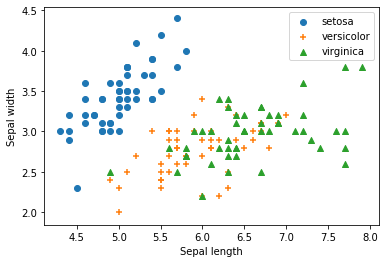

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [84]:
y2 = y.copy()              # y의 복사본을 만든다
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [85]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.7)

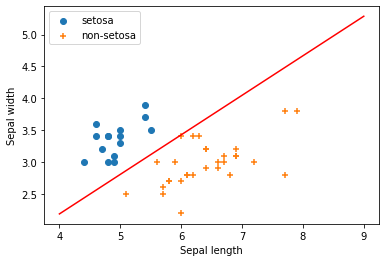

In [86]:
markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_

xx = np.linspace(4,9,100)
yy = -a/b * xx - c/b
plt.plot(xx, yy, c='r')

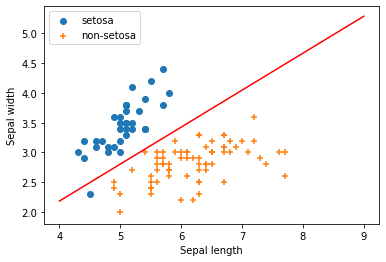

In [87]:
markers = ['o', '+', '^']
for i in range(2):
    xs = X_test[:, 0][y_test == i]
    ys = X_test[:, 1][y_test == i]
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
xx = np.linspace(4,9,100)
yy = -a/b * xx - c/b
plt.plot(xx, yy, c='r')

In [88]:
clf.score(X_test, y_test)

0.9904761904761905

# use all classes

[[-95.17766497 170.89678511]
 [ 10.57827927 -90.97320169]
 [ 53.42096394 -24.09841591]] [  68.17852546  107.75362762 -244.70577052]
multi-class score:  0.7111111111111111


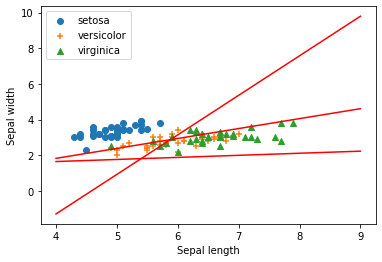

In [89]:
# use all classes
np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

X_train.shape, y_train.shape

markers = ['o', '+', '^']
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
print(clf.coef_, clf.intercept_)
print("multi-class score: ", clf.score(X_test, y_test))

for i in range(3):
    a = clf.coef_[i,0]
    b = clf.coef_[i,1]
    c = clf.intercept_[i]
    xx = np.linspace(4,9,100)
    yy = -a/b * xx - c/b
    plt.plot(xx, yy, c='r')

## SVM
- C 가 증가하면 곡선이 디테일해지고 (에러를 최대한 줄이기 위해)
- gamma 가 증가하면 섬들이 많이 생긴다

In [90]:
from sklearn.svm import SVC
# svm_clf = SVC(kernel="linear", C=float("inf"))    # infinitely large value
svm_clf = SVC(kernel="linear", C=1000)
svm_clf.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
svm_clf.coef_, svm_clf.intercept_

(array([[-6.31313254,  5.26164882],
        [-8.56797365,  7.14082987],
        [-1.3298328 , -0.66385156]]),
 array([17.30670958, 23.13132056, 10.44408877]))

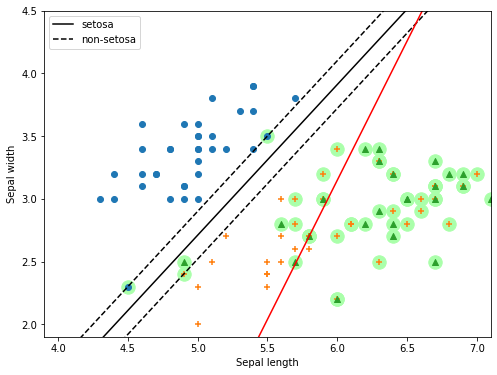

In [92]:
plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 

# svs

plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")
markers = ['o', '+', '^'] 
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i] 
    plt.scatter(xs, ys, marker=markers[i])
binary_names = ['setosa', 'non-setosa'] 
plt.legend(binary_names)
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")
# 선형분류 결정 경계선
plt.plot(XX, (-a/b * XX + -c/b), "r-")

In [93]:
svm_clf.score(X_test, y_test)

0.8

In [16]:
svs

array([[4.5, 2.3],
       [5.5, 3.5],
       [6.5, 2.8],
       [5.7, 3. ],
       [5.9, 3.2],
       [6.3, 3.3],
       [6.7, 3. ],
       [7. , 3.2],
       [4.9, 2.4],
       [5.8, 2.7],
       [6.7, 3.1],
       [5.7, 2.8],
       [6.3, 2.5],
       [6. , 2.2],
       [5.9, 3. ],
       [6. , 2.7],
       [6.7, 3.1],
       [6.1, 2.8],
       [6. , 3.4],
       [6.4, 3.2],
       [6.6, 2.9],
       [6.8, 2.8],
       [6.9, 3.1],
       [6.6, 3. ],
       [6.1, 2.8],
       [6.4, 2.9],
       [5.8, 2.7],
       [6.8, 3.2],
       [6.4, 2.7],
       [6.3, 3.3],
       [6.3, 2.9],
       [6.5, 3. ],
       [4.9, 2.5],
       [6.7, 2.5],
       [5.9, 3. ],
       [5.6, 2.8],
       [6. , 2.2],
       [6.5, 3. ],
       [7.1, 3. ],
       [6.7, 3.1],
       [6.4, 2.8],
       [6.7, 3.3],
       [6.7, 3. ],
       [6.4, 3.2],
       [5.7, 2.5],
       [6.3, 3.4],
       [6.9, 3.2],
       [5.8, 2.7],
       [6.9, 3.1],
       [6.2, 3.4],
       [6.2, 2.8]])

## 커널 기법

In [94]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 

In [95]:
X = cancer.data
y = cancer.target

In [96]:
X.shape, y.shape

((569, 30), (569,))

In [108]:
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(SVC(kernel='rbf', C=100, gamma=0.1,probability=True))
classifier = classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8

In [109]:
clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7333333333333333

In [110]:
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)
print("SVM score:", svm_clf.score(X_test, y_test))

SVM score: 0.8


# 연습 (my own)

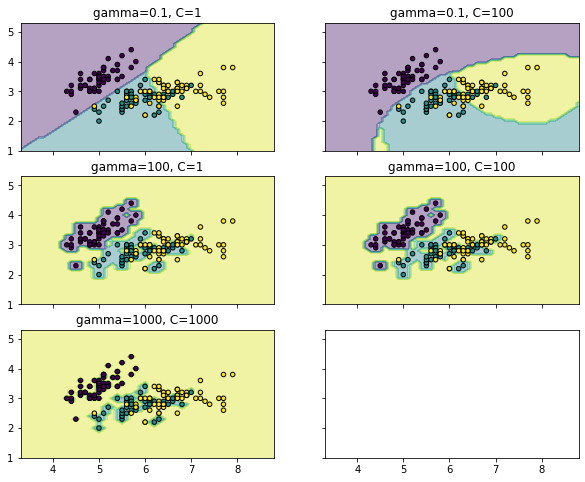

(0.82, 0.82, 0.92, 0.9266666666666666, 0.9266666666666666)

In [111]:
from itertools import product
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)
clf5.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

# 확인
clf1.score(X, y), clf2.score(X, y), clf3.score(X, y), clf4.score(X, y), clf5.score(X,y)

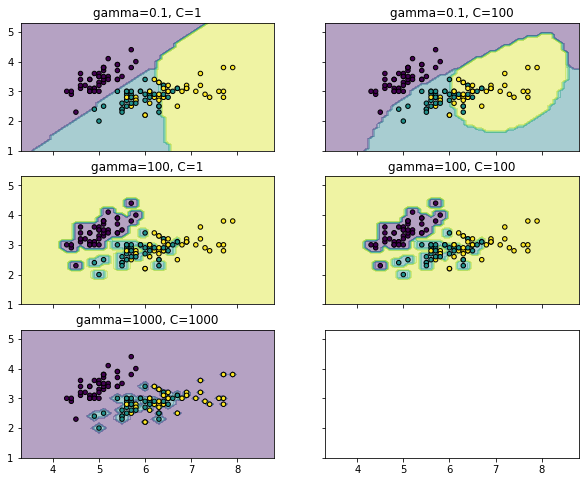

0.8166666666666667 0.8333333333333334 0.9166666666666666 0.9333333333333333 0.9333333333333333


In [113]:
# for train and test data
iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training classifiers
clf1 = SVC(gamma=.1, C=1, kernel='rbf', probability=True)
clf2 = SVC(gamma=.1, C=100, kernel='rbf', probability=True)
clf3 = SVC(gamma=100, C=1, kernel='rbf', probability=True)
clf4 = SVC(gamma=100, C=100, kernel='rbf', probability=True)
clf5 = SVC(gamma=1000, C=1000, kernel='rbf', probability=True)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)


# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_train, y_train), 
       clf2.score(X_train, y_train),
       clf3.score(X_train, y_train),
       clf4.score(X_train, y_train),
       clf5.score(X_train, y_train))

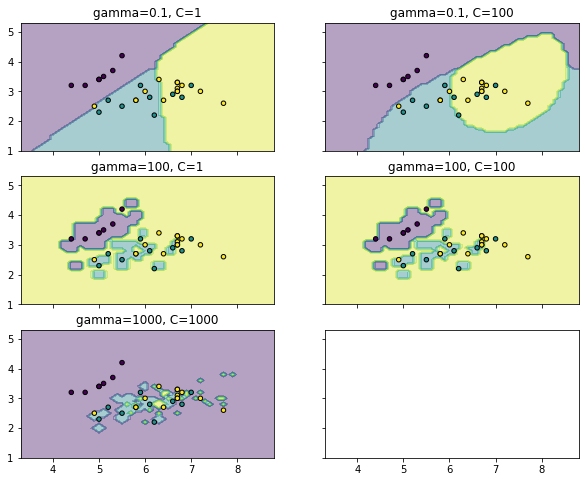

0.7666666666666667 0.7 0.6333333333333333 0.6333333333333333 0.4


In [114]:
# for test data
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5],
                        ['gamma=0.1, C=1', 'gamma=0.1, C=100',
                         'gamma=100, C=1', 'gamma=100, C=100',
                        'gamma=1000, C=1000']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# 확인
print (clf1.score(X_test, y_test), 
       clf2.score(X_test, y_test),
       clf3.score(X_test, y_test),
       clf4.score(X_test, y_test),
       clf5.score(X_test, y_test))

# One more
- binary classification
- target to predict is a XOR of the inputs
- illustrate decision function learned by SVC

In [26]:
xx, yy = np.meshgrid(np.linspace(1,5,5), np.linspace(1,3,3))
print(xx)
print(yy)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]


In [27]:
np.c_[xx.ravel(), yy.ravel()]

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [1., 2.],
       [2., 2.],
       [3., 2.],
       [4., 2.],
       [5., 2.],
       [1., 3.],
       [2., 3.],
       [3., 3.],
       [4., 3.],
       [5., 3.]])

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

In [29]:
xx.shape

(500, 500)

In [30]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [31]:
X.shape, Y.shape

((300, 2), (300,))

In [32]:
X[:3], Y[:3]

(array([[ 1.76405235,  0.40015721],
        [ 0.97873798,  2.2408932 ],
        [ 1.86755799, -0.97727788]]),
 array([False, False,  True]))

In [33]:
# fit the model
clf = svm.NuSVC(gamma='auto')   # uses 1./n_features
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
# ravel(): Return a contiguous flattened array.
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # evaluate the decision function

In [34]:
Z.shape

(250000,)

In [35]:
Z = Z.reshape(xx.shape)    # 500 x 500

In [36]:
np.c_[xx.ravel(), yy.ravel()].shape

(250000, 2)

- plt.imshow(): Display data as an image, i.e., on a 2D regular raster.

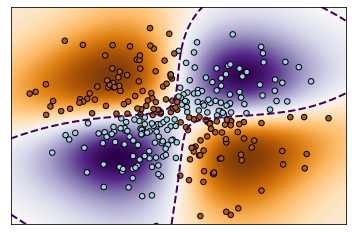

In [37]:
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

- 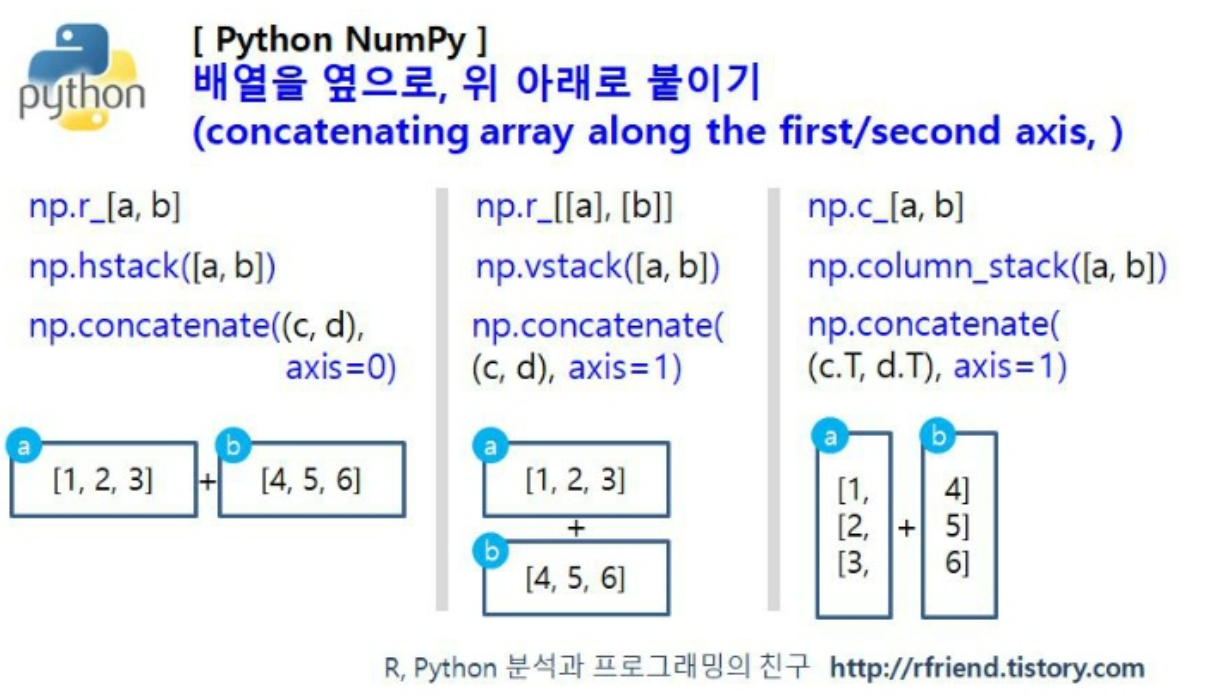

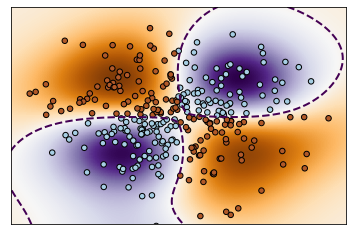

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.SVC(gamma='auto', C=5)
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# One more
- https://broscoding.tistory.com/148

In [40]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=ad712514cb36e82688b660c654e5cafbb3264da5495dfe709c75fb793939824c
  Stored in directory: c:\users\rtaje\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [60]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import mglearn

iris = load_iris()
col1, col2 = 0, 1
X = iris.data[:,[col1,col2]]
y = iris.target

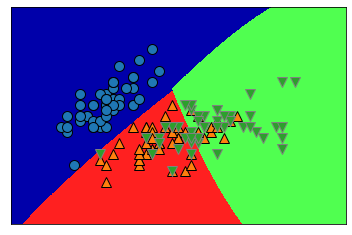

In [63]:
model = SVC()    # C=1.0, kernel='rbf', degree=3, gamma='scale' (1/(n_featutes * X.var())
model.fit (X, y)
mglearn.plots.plot_2d_classification(model, X, y)
mglearn.discrete_scatter(X[:,col1], X[:,col2], y)

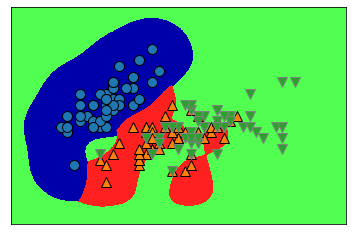

In [65]:
model = SVC(gamma=5, C=100)
model.fit (X, y)
mglearn.plots.plot_2d_classification(model, X, y)
mglearn.discrete_scatter(X[:,col1], X[:,col2], y)

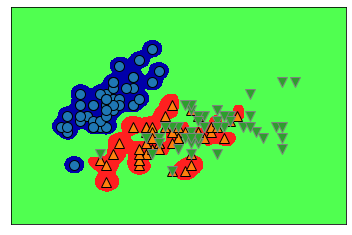

In [44]:
model = SVC(C=100, gamma=100)
model.fit (X, y)
mglearn.plots.plot_2d_classification(model, X, y)
mglearn.discrete_scatter(X[:,col1], X[:,col2], y)

# Plot the decision boundaries of a VotingClassifier
- from https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html\
    #sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py

In [45]:
xx, yy = np.meshgrid(np.linspace(0,2,3), np.linspace(0,2,3))
print(xx, '\n', yy)
xx.shape

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]] 
 [[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


(3, 3)

In [46]:
xx.ravel()

array([0., 1., 2., 0., 1., 2., 0., 1., 2.])

In [47]:
np.c_[xx.ravel(), yy.ravel()]

array([[0., 0.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [1., 2.],
       [2., 2.]])

In [48]:
from itertools import product
list(product([0, 1], [0, 1]))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [49]:
print(__doc__)

Automatically created module for IPython interactive environment


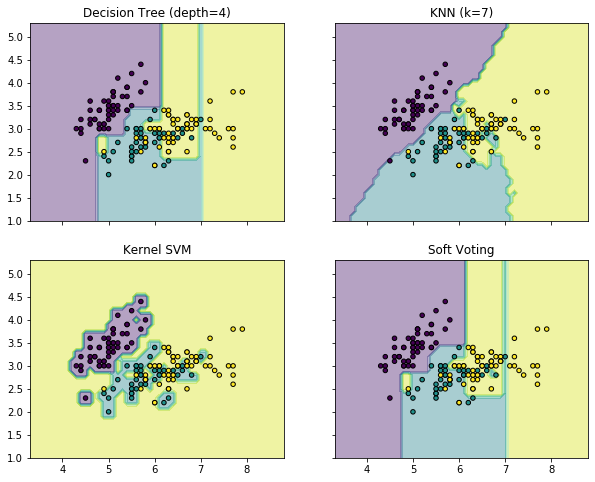

0.8533333333333334 0.8266666666666667 0.9266666666666666 0.86


In [50]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=6)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=1e2, C=100, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
print(clf1.score(X, y),clf2.score(X, y),clf3.score(X, y),eclf.score(X, y))